## 오차역전파 (Backpropagation)


### 오차역전파 알고리즘
- 학습 데이터로 정방향(forward) 연산을 통해 손실함수 값(loss)을 구함

- 각 layer별로 역전파학습을 위해 중간값을 저장

- 손실함수를 학습 파라미터(가중치, 편향)로 미분하여  
  마지막 layer로부터 앞으로 하나씩 연쇄법칙을 이용하여 미분
  각 layer를 통과할 때마다 저장된 값을 이용

- 오류(error)를 전달하면서 학습 파라미터를 조금씩 갱신


### 오차역전파 학습의 특징
- 손실함수를 통한 평가를 한 번만 하고, 연쇄법칙을 이용한 미분을 활용하기 때문에  
  학습 소요시간이 매우 단축!

- 미분을 위한 중간값을 모두 저장하기 때문에 메모리를 많이 사용


### 신경망 학습에 있어서 미분가능의 중요성
- 경사하강법(Gradient Descent)에서 손실 함수(cost function)의 최소값,  
  즉, 최적값을 찾기 위한 방법으로 미분을 활용

- 미분을 통해 손실 함수의 학습 매개변수(trainable parameter)를 갱신하여  
  모델의 가중치의 최적값을 찾는 과정

![](https://i.pinimg.com/originals/5d/13/20/5d1320c7b672710834e63b95a7c1037b.png)

<sub>출처: https://www.pinterest.co.kr/pin/424816177350692379/</sub>

### 합성함수의 미분 (연쇄법칙, chain rule)

## $\qquad \frac{d}{dx} [f(g(x))] = f^\prime(g(x))g^\prime(x)$  


- 여러 개 연속으로 사용가능  
  ## $ \quad \frac{\partial f}{\partial x} = \frac{\partial f}{\partial u} \times \frac{\partial u}{\partial m} \times \frac{\partial m}{\partial n} \times \ ... \ \frac{\partial l}{\partial k} \times \frac{\partial k}{\partial g} \times \frac{\partial g}{\partial x}
  $
- 각각에 대해 편미분 적용가능

![](https://cdn-media-1.freecodecamp.org/images/1*_KMMFvRP5X9kC59brI0ykw.png)
<sub>출처: https://www.freecodecamp.org/news/demystifying-gradient-descent-and-backpropagation-via-logistic-regression-based-image-classification-9b5526c2ed46/</sub>

- **오차역전파의 직관적 이해**
  - 학습을 진행하면서, 즉 손실함수의 최소값(minimum)을 찾아가는 과정에서 가중치 또는 편향의 변화에 따라 얼마나 영향을 받는지 알 수 있음



#### 합성함수 미분(chain rule) 예제

![](https://miro.medium.com/max/1000/1*azqHvbrNsZ8AIZ7H75tbIQ.jpeg)

<sub>출처: https://medium.com/spidernitt/breaking-down-neural-networks-an-intuitive-approach-to-backpropagation-3b2ff958794c</sub>

  #### $\quad a=-1, \ b=3, \ c=4$,
  #### $\quad x = a + b, \ y = b + c, \ f = x * y \ 일 때$    



  ### $\quad \begin{matrix}\frac{\partial f}{\partial x} &=& y\ + \ x \ \frac{\partial y}{\partial x} \\
  &=& (b \ + \ c) \ + \ (a \ +\ b)\ \times \ 0 \\
  &=& 7 \end{matrix}$

  ### $\quad \begin{matrix}\frac{\partial f}{\partial y} &=& x\ + \ \frac{\partial x}{\partial y} \ y \\
  &=& (a \ + \ b) \ + \ 0 \times (b \ +\ c) \\
  &=& 2 \end{matrix}$

   <br>

  ### $ \quad \begin{matrix} \frac{\partial x}{\partial a} &=& 1 \ + \ a \ \frac{\partial b}{\partial a} \\
  &=& 1 \end{matrix} $
  ### $ \quad \begin{matrix} \frac{\partial y}{\partial c} &=& \frac{\partial b}{\partial c}\ + 1 \\
   &=& 1 \end{matrix} $
  
  <br>

  ### $ \quad \begin{matrix} \frac{\partial f}{\partial a} &=& \frac{\partial f}{\partial x} \times \frac{\partial x}{\partial a} \\
  &=& y \times 1 \\
  &=& 7 \times 1 = 7 \\
  &=& 7  \end{matrix} $
    
  ### $ \quad \begin{matrix} \frac{\partial f}{\partial b}\
  &=& \frac{\partial x}{\partial b} \ y \ + \ x \ \frac{\partial y}{\partial b}  \\
  &=& 1 \times 7 + 2 \times 1  \\
  &=& 9 \end{matrix} $
  

  
  

### 덧셈, 곱셈 계층의 역전파
- 위 예제를 통해 아래 사항을 알 수 있음

  #### 1. $\quad z = x + y$ 일 때,
  ## $\frac{\partial z}{\partial x} = 1, \frac{\partial z}{\partial y} = 1 $

  #### 2. $\quad t = xy$ 일 때,
  ## $\frac{\partial t}{\partial x} = y, \frac{\partial t}{\partial y} = x$


In [1]:
class Mul():

  def __init__(self):
    self.x = None
    self.y = None

  def forward(self, x, y):
    self.x = x
    self.y = y
    result = x * y
    return result

  def backward(self, dresult):
    dx = dresult * self.y
    dy = dresult * self.x
    return dx, dy


In [2]:
class Add():

  def __init__(self):
    self.x = None
    self.y = None

  def forward(self, x, y):
    self.x = x
    self.y = y
    result = x + y
    return result

  def backward(self, dresult):
    dx = dresult * 1
    dy = dresult * 1
    return dx, dy

In [3]:
a, b, c = -1, 3, 4
x = Add()
y = Add()
f = Mul()

In [4]:
x_result = x.forward(a, b)
y_result = y.forward(b, c)

print(x_result)
print(y_result)
print(f.forward(x_result, y_result))

2
7
14


In [5]:
dresult = 1
dx_mul, dy_mul = f.backward(dresult)

da_add, db_add_1 = x.backward(dx_mul)
db_add_2, dc_add = y.backward(dy_mul)

print(dx_mul, dy_mul)
print(da_add)
print(db_add_1 + db_add_2)
print(dc_add)

7 2
7
9
2


![](https://miro.medium.com/max/2000/1*U3mVDYuvnaLhJzIFw_d5qQ.png)
<sub>출처: https://medium.com/spidernitt/breaking-down-neural-networks-an-intuitive-approach-to-backpropagation-3b2ff958794c</sub>

### 활성화 함수(Activation)에서의 역전파

#### 시그모이드(Sigmoid) 함수

![](https://media.geeksforgeeks.org/wp-content/uploads/20190911181329/Screenshot-2019-09-11-18.05.46.png)

<sub>출처: https://www.geeksforgeeks.org/implement-sigmoid-function-using-numpy/</sub>

- 수식
  # $\quad y = \frac{1}{1 + e^{-x}} $일 때,

  ## $\quad \begin{matrix}y' &=& (\frac{1}{1 + e^{-x}})' \\
  &=& \frac{-1}{(1 + e^{-x})^2}\ \times \ (-e^{-x}) \\
  &=& \frac{1}{1 + e^{-x}} \ \times \ \frac{e^{-x}}{1 + e^{-x}} \\
  &=& \frac{1}{1 + e^{-x}} \ \times \ (1 - \frac{1}{1 + e^{-x}}) \\
  &=& y\ (1\ - \ y)
  \end{matrix}$

In [6]:
import numpy as np

class Sigmoid():

  def __init__(self):
    self.out = None

  def forward(self, x):
    out = 1 / (1 + np.exp(-x))
    return out

  def backward(self, dout):
    dx = dout * (1.0 - self.out) * self.dout
    return dx

#### ReLU 함수

![](https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2018/10/Line-Plot-of-Rectified-Linear-Activation-for-Negative-and-Positive-Inputs.png)

<sub>출처: https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/</sub>


- 수식  

  ### $\qquad y=
  \begin{cases}
  x & (x \ge 0)  \\
  0 & (x < 0)
  \end{cases}$ 일 때,

  <br>

  ### $\qquad \frac{\partial y}{\partial x}=
  \begin{cases}
  1 & (x \ge 0)  \\
  0 & (x < 0)
  \end{cases}$

In [7]:
class ReLU():

  def __init__(self):
    self.out = None

  def forward(self, x):
    self.mask = (x < 0)
    out = x.copy()
    out[x<0] = 0
    return out

  def backward(self, dout):
    dout[self.mask] = 0
    dx = dout
    return dx

### 행렬 연산에 대한 역전파

# $\qquad Y = X \bullet W + B$

#### 순전파(forward)
  
  - 형상(shape)을 맞춰줘야함
  - 앞서 봤던 곱셈, 덧셈 계층을 합친 형태

In [8]:
X = np.random.rand(3)
W = np.random.rand(3, 2)
B = np.random.rand(2)

print(X.shape)
print(W.shape)
print(B.shape)

(3,)
(3, 2)
(2,)


In [9]:
Y = np.dot(X, W) + B
print(Y.shape)

(2,)


In [10]:
X = np.random.rand(3)
W = np.random.rand(2, 2)
B = np.random.rand(2)

print(X.shape)
print(W.shape)
print(B.shape)

(3,)
(2, 2)
(2,)


In [11]:
Y = np.dot(X, W) + B
print(Y.shape)
# np.dot 함수는 두 배열의 내적을 계산한다.
#내적을 계산하려면 첫 번째 배열의 열 수와 두 번째 배열의 행 수가 같아야 한다.
# X의 열 수는 3이고 W의 행 수는 2이므로 shape이 일치하지 않는다. 따라서 ValueError가 발생 **

ValueError: shapes (3,) and (2,2) not aligned: 3 (dim 0) != 2 (dim 0)

#### 역전파(1)

##  $\  Y = X \bullet W$
- $X :\ \ (2,\ )$

- $W :\ \ (2,\ 3)$

- $X \bullet W :\ \ (3,\ )$

- $\frac{\partial L}{\partial Y} :\ \ (3,\ )$

- $\frac{\partial L}{\partial X} = \frac{\partial L}{\partial Y}\bullet W^T ,\ (2,\ )$

- $\frac{\partial L}{\partial W} = X^T \bullet \frac{\partial L}{\partial Y} ,\ (2,\ 3)$



In [12]:
X = np.random.randn(2)
W = np.random.randn(2, 3)
Y = np.dot(X, W)

print("X\n{}".format(X))
print("W\n{}".format(W))
print("Y\n{}".format(Y))

X
[-1.81607449 -0.23449418]
W
[[-0.88123562  2.8101045   1.66961195]
 [-0.73448874  1.65921975 -0.42002786]]
Y
[ 1.77262287 -5.49243649 -2.93364558]


In [13]:
dL_dY = np.random.randn(3)
dL_dX = np.dot(dL_dY, W.T)
dL_dW = np.dot(X.reshape(-1, 1), dL_dY.reshape(1, -1))

print("dL_dY\n {}".format(dL_dY))
print("dL_dX\n {}".format(dL_dX))
print("dL_dW\n {}".format(dL_dW))

dL_dY
 [-0.89762196  0.78350206  0.53540307]
dL_dX
 [3.88665446 1.7344111 ]
dL_dW
 [[ 1.63014834 -1.4228981  -0.97233186]
 [ 0.21048713 -0.18372667 -0.12554891]]


#### 역전파(2)

## $\ (2)\  Y = X \bullet W + B$
- $X, W$는 위와 동일

- $B: \ (3, )$

- $\frac{\partial L}{\partial B} = \frac{\partial L}{\partial Y}, \ (3,\ )$

In [14]:
X = np.random.randn(2)
W = np.random.randn(2, 3)
B = np.random.randn(3)
Y = np.dot(X, W) + B
print(Y)

[-2.88333741 -1.03075617  3.48585346]


In [15]:
dL_dY = np.random.randn(3)
dL_dX = np.dot(dL_dY, W.T)
dL_dW = np.dot(X.reshape(-1, 1), dL_dY.reshape(1, -1))
dL_dB = dL_dY

print("dL_dY\n{}".format(dL_dY))
print("dL_dX\n{}".format(dL_dX))
print("dL_dW\n{}".format(dL_dW))
print("dL_dB\n{}".format(dL_dB))

dL_dY
[ 0.80246208 -0.56634725  0.95726248]
dL_dX
[-0.24630116  0.29656935]
dL_dW
[[-1.72679255  1.21870457 -2.0599026 ]
 [ 1.36406496 -0.96270523  1.62720239]]
dL_dB
[ 0.80246208 -0.56634725  0.95726248]


#### 배치용 행렬 내적 계층
- N개의 데이터에 대해,  
# $\qquad Y = X \bullet W + B$

  - $X : \quad  (N,\ 3)$

  - $W : \quad  (3,\ 2)$

  - $B : \quad  (2,\ )$
  

In [16]:
X = np.random.rand(4, 3)
W = np.random.rand(3, 2)
B = np.random.rand(2)

print(X.shape)
print(W.shape)
print(B.shape)

(4, 3)
(3, 2)
(2,)


In [17]:
print("X\n{}".format(X))
print("W\n{}".format(W))
print("B\n{}".format(B))

X
[[0.48739056 0.82497807 0.83675992]
 [0.30337004 0.10025118 0.71253457]
 [0.25474385 0.11815561 0.13114815]
 [0.36809993 0.0124405  0.00779342]]
W
[[0.10110915 0.05591815]
 [0.43012451 0.81402718]
 [0.64932872 0.33070778]]
B
[0.06173016 0.28855886]


In [18]:
Y = np.dot(X, W) + B

print("Y\n{}".format(Y))
print("Y.shape: ", Y.shape)

Y
[[1.00918533 1.26409042]
 [0.5981933  0.62277066]
 [0.22346697 0.44235725]
 [0.10935989 0.32184658]]
Y.shape:  (4, 2)


In [19]:
dL_dY = np.random.randn(4, 2)
dL_dX = np.dot(dL_dY, W.T)
dL_dW = np.dot(X.T, dL_dY)
dL_dB = np.sum(dL_dY, axis=0)

print("dL_dY\n{}".format(dL_dY))
print("dL_dX\n{}".format(dL_dX))
print("dL_dW\n{}".format(dL_dW))
print("dL_dB\n{}".format(dL_dB))

dL_dY
[[-0.36649488 -0.91535652]
 [ 0.47149517  1.44678334]
 [-1.01701251 -1.8083023 ]
 [-1.15521765 -0.69691125]]
dL_dX
[[-0.08824103 -0.90276351 -0.54069117]
 [ 0.12857393  1.38052258  0.78461786]
 [-0.2039462  -1.90944922 -1.25839507]
 [-0.15577307 -1.06419212 -0.98058997]]
dL_dW
[[-0.71990185 -0.72441227]
 [-0.38961951 -0.8324383 ]
 [-0.11309403  0.02236268]]
dL_dB
[-2.06722987 -1.97378672]


In [20]:
class Layer():

  def __init__(self):
    self.W = np.random.randn(3, 2)
    self.b = np.random.randn(2)
    self.x = None
    self.dW =None
    self.db = None

  def forward(self, x):
    self.x = x
    out = np.dot(x, self.W) + self.b
    return out

  def backward(self, dout):
    dx = np.dot(dout, self.W.T)
    self.dW = np.dot(self.x.T, dout)
    self.db = np.sum(dout, axis=0)
    return dx

In [21]:
np.random.seed(111)

layer =Layer()

In [22]:
X = np.random.rand(2, 3)
Y = layer.forward(X)

print(X)

[[0.23868214 0.33765619 0.99071246]
 [0.23772645 0.08119266 0.66960024]]


In [23]:
dout = np.random.rand(2, 2)
dout_dx = layer.backward(dout)

print(dout_dx)

[[-0.59898814  0.83225859 -0.61525238]
 [-0.48312871  0.65565961 -0.42154775]]


### MNIST 분류 with 역전파


#### Modules Import

In [38]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')
from collections import OrderedDict

#### 데이터 로드

In [39]:
np.random.seed(42)

# 데이터 로드 및 전처리
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

num_classes = 10

#### 데이터 전처리

In [40]:
X_train = X_train.reshape(-1, 28 * 28).astype(np.float32)
X_test = X_test.reshape(-1, 28 * 28).astype(np.float32)


X_train /= 255
X_test /= 255

In [41]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


#### Hyper Parameters

In [42]:
epochs = 1000
learning_rate = 1e-3
batch_size = 100
train_size = X_train.shape[0]

#### Util Functions

In [43]:
def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T

    x = x - np.max(x)
    return np.exp(x) / np.sum(np.exp(x))

def mean_squared_error(pred_y, true_y):
  return 0.5 * np.sum((pred_y - true_y) ** 2)

def cross_entropy_error(pred_y, true_y):
    if pred_y.ndim == 1:
        true_y = true_y.reshape(1, true_y.size)
        pred_y = pred_y.reshape(1, pred_y.size)

    if true_y.size == pred_y.size:
        true_y = true_y.argmax(axis=1)

    batch_size = pred_y.shape[0]
    return -np.sum(np.log(pred_y[np.arange(batch_size), true_y]+1e-7)) / batch_size

def softmax_loss(X, true_y):
  pred_y = softmax(X)
  return cross_entropy_error(pred_y, true_y)


#### Util Classes

##### ReLU

In [44]:
class ReLU:
    def __init__(self):
        self.mask = None

    def forward(self, x):
        self.mask = (x <= 0)
        out = x.copy()
        out[self.mask] = 0
        return out

    def backward(self, dout):
        dout[self.mask] = 0
        return dout

##### Sigmoid

In [45]:
class Sigmoid:
    def __init__(self):
        self.out = None

    def forward(self, x):
        out = 1 / (1 + np.exp(-x))
        self.out = out
        return out

    def backward(self, dout):
        dx = dout * (1.0 - self.out) * self.out
        return dx

##### Layer

In [46]:
class Layer:
    def __init__(self, W, b):
        self.W = W
        self.b = b
        self.x = None
        self.dL_dW = None  # 수정: dl_dW -> dL_dW (일관성)
        self.dL_db = None

    def forward(self, x):
        self.x = x
        return np.dot(x, self.W) + self.b

    def backward(self, dout):
        self.dL_dW = np.dot(self.x.T, dout)
        self.dL_db = np.sum(dout, axis=0)
        dx = np.dot(dout, self.W.T)
        return dx


#### Softmax

In [47]:
class Softmax:
    def __init__(self):
        self.loss = None
        self.y = None
        self.t = None

    def forward(self, x, t):
        self.t = t
        self.y = softmax(x)
        self.loss = cross_entropy_error(self.y, self.t)
        return self.loss

    def backward(self, dout=1):
        batch_size = self.t.shape[0]
        if self.t.size == self.y.size:
            dx = (self.y - self.t) / batch_size
        else:
            dx = self.y.copy()
            dx[np.arange(batch_size), self.t] -= 1
            dx = dx / batch_size
        return dx

In [48]:
class MyModel:
    def __init__(self, input_size, hidden_size_list, output_size, activation='relu'):
        self.input_size = input_size
        self.output_size = output_size
        self.hidden_size_list = hidden_size_list
        self.hidden_layer_num = len(hidden_size_list)
        self.params = {}

        self.__init_weights(activation)

        activation_layer = {'sigmoid': Sigmoid, 'relu': ReLU}
        self.layers = OrderedDict()

        for idx in range(1, self.hidden_layer_num + 1):
            self.layers['Layer' + str(idx)] = Layer(self.params['W' + str(idx)],
                                                  self.params['b' + str(idx)])
            self.layers['Activation_function' + str(idx)] = activation_layer[activation]()

        idx = self.hidden_layer_num + 1
        self.layers['Layer' + str(idx)] = Layer(self.params['W' + str(idx)],
                                              self.params['b' + str(idx)])

        self.last_layer = Softmax()

    def __init_weights(self, activation):
        all_size_list = [self.input_size] + self.hidden_size_list + [self.output_size]
        for idx in range(1, len(all_size_list)):
            if activation.lower() == 'relu':
                weight_std = np.sqrt(2.0 / all_size_list[idx-1])
            elif activation.lower() == 'sigmoid':
                weight_std = np.sqrt(1.0 / all_size_list[idx-1])

            self.params['W' + str(idx)] = weight_std * np.random.randn(all_size_list[idx-1], all_size_list[idx])
            self.params['b' + str(idx)] = np.zeros(all_size_list[idx])  # 수정: random -> zeros

    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)
        return x

    def loss(self, x, true_y):
        pred_y = self.predict(x)
        return self.last_layer.forward(pred_y, true_y)

    def accuracy(self, x, true_y):
        pred_y = self.predict(x)
        pred_y = np.argmax(pred_y, axis=1)

        if true_y.ndim != 1:
            true_y = np.argmax(true_y, axis=1)

        accuracy = np.sum(pred_y == true_y) / float(x.shape[0])
        return accuracy

    def gradient(self, x, t):
        # Forward
        self.loss(x, t)

        # Backward
        dout = 1
        dout = self.last_layer.backward(dout)

        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        # 기울기 저장
        grads = {}
        for idx in range(1, self.hidden_layer_num + 2):
            grads['W' + str(idx)] = self.layers['Layer' + str(idx)].dL_dW
            grads['b' + str(idx)] = self.layers['Layer' + str(idx)].dL_db

        return grads

#### 모델 생성 및 학습

In [49]:
model = MyModel(784, [100, 64, 32], 10, activation='relu')

In [50]:
train_loss_list = []
train_acc_list = []
test_acc_list = []

In [51]:
for epoch in range(epochs):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = X_train[batch_mask]
    y_batch = y_train[batch_mask]

    grad = model.gradient(x_batch, y_batch)

    # 가중치 업데이트
    for key in model.params.keys():
        model.params[key] -= learning_rate * grad[key]

    loss = model.loss(x_batch, y_batch)
    train_loss_list.append(loss)

    if epoch % 50 == 0:
        train_acc = model.accuracy(X_train, y_train)
        test_acc = model.accuracy(X_test, y_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print(f"Epoch: {epoch+1}, Train_acc: {train_acc:.4f}, Test_acc: {test_acc:.4f}")

Epoch: 1, Train_acc: 0.1290, Test_acc: 0.1251
Epoch: 51, Train_acc: 0.1419, Test_acc: 0.1373
Epoch: 101, Train_acc: 0.1549, Test_acc: 0.1497
Epoch: 151, Train_acc: 0.1702, Test_acc: 0.1643
Epoch: 201, Train_acc: 0.1914, Test_acc: 0.1854
Epoch: 251, Train_acc: 0.2162, Test_acc: 0.2150
Epoch: 301, Train_acc: 0.2414, Test_acc: 0.2427
Epoch: 351, Train_acc: 0.2617, Test_acc: 0.2657
Epoch: 401, Train_acc: 0.2791, Test_acc: 0.2843
Epoch: 451, Train_acc: 0.2994, Test_acc: 0.3033
Epoch: 501, Train_acc: 0.3150, Test_acc: 0.3200
Epoch: 551, Train_acc: 0.3332, Test_acc: 0.3382
Epoch: 601, Train_acc: 0.3483, Test_acc: 0.3551
Epoch: 651, Train_acc: 0.3643, Test_acc: 0.3717
Epoch: 701, Train_acc: 0.3829, Test_acc: 0.3896
Epoch: 751, Train_acc: 0.3989, Test_acc: 0.4032
Epoch: 801, Train_acc: 0.4167, Test_acc: 0.4205
Epoch: 851, Train_acc: 0.4385, Test_acc: 0.4447
Epoch: 901, Train_acc: 0.4584, Test_acc: 0.4655
Epoch: 951, Train_acc: 0.4770, Test_acc: 0.4830


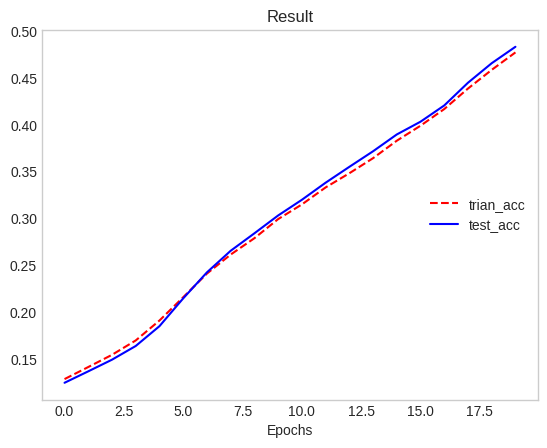

In [53]:
plt.plot(np.arange(1000/50), train_acc_list, 'r--', label='trian_acc')
plt.plot(np.arange(1000/50), test_acc_list, 'b', label='test_acc')

plt.title('Result')
plt.xlabel('Epochs')
plt.legend(loc=5)
plt.grid()
plt.show()

## 모델 성능 개선해보기
1. 단순 255로 나누는 대신 평균을 빼고 표준편차로 나누어 정규화
- 데이터를 평균 0, 표준편차1로 정규화하면 모든 특성이 동일한 스케일을 가지게 해서 데이터의 분포를 균일하게 만들면 경사하강법의 수렴을 더 안정적이고 빠르게 만들기 때문

2. 모델 구조 개선 - 히든 레이어 더 넓게 설정, He초기화 사용
- 히든 레이어
  - 더 많은 뉴런으로 복잡한 패턴 학습, 중간 레이어도 충분한 표현력을 가지게 하기 위함
- He 초기화
  - ReLU 활성화 함수와 함께 사용하면 효과적, 기울기 소실/초과 문제를 완화
3. 옵티마이저 개선
- 모멘텀 SGD 구현 및 적용
  - 일반 SGD보다 local minima회피에 효과적
- 학습률을 0.01로 증가
  - 초기에는 큰 학습률로 빠르게 학습하고 점진적으로 줄여서 미세 조정을 가능하게 하기 위함
- 200에포크마다 학습률을 절반으로 감소
4. 학습 과정 개선
- 배치 사이즈를 256으로 증가
  - 더 안정적인 그래디언트 추정, 너무 작은 배치는 노이즈가 많고, 너무 크면 일반화가 약화됨


In [54]:
# 정규화 개선

X_train = (X_train - np.mean(X_train)) / np.std(X_train)
X_test = (X_test - np.mean(X_test)) / np.std(X_test)

y_train = np.eye(num_classes)[y_train]

In [55]:
# 하이퍼 파라미터 수정
epochs = 1000
learning_rate = 0.01 # 학습률 증가
batch_size = 256 # 배치사이즈 증가
train_size = X_train.shape[0]

**SGD 추가**

In [56]:
# 모멘텀 SGD추가
class MomentumSGD:
    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None

    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)

        for key in params.keys():
            self.v[key] = self.momentum * self.v[key] - self.lr * grads[key]
            params[key] += self.v[key]

##### ReLU

In [57]:
class ReLU:
    def __init__(self):
        self.mask = None

    def forward(self, x):
        self.mask = (x <= 0)
        out = x.copy()
        out[self.mask] = 0
        return out

    def backward(self, dout):
        dout[self.mask] = 0
        return dout

##### Sigmoid

In [58]:
class Sigmoid:
    def __init__(self):
        self.out = None

    def forward(self, x):
        out = 1 / (1 + np.exp(-x))
        self.out = out
        return out

    def backward(self, dout):
        dx = dout * (1.0 - self.out) * self.out
        return dx

##### Layer

In [59]:
class Layer:
    def __init__(self, W, b):
        self.W = W
        self.b = b
        self.x = None
        self.dL_dW = None  # 수정: dl_dW -> dL_dW (일관성)
        self.dL_db = None

    def forward(self, x):
        self.x = x
        return np.dot(x, self.W) + self.b

    def backward(self, dout):
        self.dL_dW = np.dot(self.x.T, dout)
        self.dL_db = np.sum(dout, axis=0)
        dx = np.dot(dout, self.W.T)
        return dx


#### Softmax

In [60]:
class Softmax:
    def __init__(self):
        self.loss = None
        self.y = None
        self.t = None

    def forward(self, x, t):
        self.t = t
        self.y = softmax(x)
        self.loss = cross_entropy_error(self.y, self.t)
        return self.loss

    def backward(self, dout=1):
        batch_size = self.t.shape[0]
        if self.t.size == self.y.size:
            dx = (self.y - self.t) / batch_size
        else:
            dx = self.y.copy()
            dx[np.arange(batch_size), self.t] -= 1
            dx = dx / batch_size
        return dx

In [65]:
class MyModel:
    def __init__(self, input_size, hidden_size_list, output_size, activation='relu'):
        self.input_size = input_size
        self.output_size = output_size
        self.hidden_size_list = hidden_size_list
        self.hidden_layer_num = len(hidden_size_list)
        self.params = {}
        self.optimizer = MomentumSGD()

        self.__init_weights(activation)

        activation_layer = {'sigmoid': Sigmoid, 'relu': ReLU}
        self.layers = OrderedDict()

        for idx in range(1, self.hidden_layer_num + 1):
            self.layers['Layer' + str(idx)] = Layer(self.params['W' + str(idx)],
                                                  self.params['b' + str(idx)])
            self.layers['Activation_function' + str(idx)] = activation_layer[activation]()

        idx = self.hidden_layer_num + 1
        self.layers['Layer' + str(idx)] = Layer(self.params['W' + str(idx)],
                                              self.params['b' + str(idx)])

        self.last_layer = Softmax()

    def __init_weights(self, activation):
        all_size_list = [self.input_size] + self.hidden_size_list + [self.output_size]
        for idx in range(1, len(all_size_list)):
            scale = np.sqrt(2.0 / all_size_list[idx-1])  # He 초기화
            self.params['W' + str(idx)] = scale * np.random.randn(all_size_list[idx-1], all_size_list[idx])
            self.params['b' + str(idx)] = np.zeros(all_size_list[idx])

    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)
        return x

    def loss(self, x, true_y):
        pred_y = self.predict(x)
        return self.last_layer.forward(pred_y, true_y)

    def accuracy(self, x, true_y):
        pred_y = self.predict(x)
        pred_y = np.argmax(pred_y, axis=1)

        if true_y.ndim != 1:
            true_y = np.argmax(true_y, axis=1)

        accuracy = np.sum(pred_y == true_y) / float(x.shape[0])
        return accuracy

    def gradient(self, x, t):
        # Forward
        self.loss(x, t)

        # Backward
        dout = 1
        dout = self.last_layer.backward(dout)

        layers = list(self.layers.values())
        layers.reverse()

        for layer in layers:
            dout = layer.backward(dout)

        # 기울기 저장
        grads = {}
        for idx in range(1, self.hidden_layer_num + 2):
            grads['W' + str(idx)] = self.layers['Layer' + str(idx)].dL_dW
            grads['b' + str(idx)] = self.layers['Layer' + str(idx)].dL_db

        return grads

    def update(self, grad):
        self.optimizer.update(self.params, grad)

In [66]:
# 모델 생성 (더 큰 네트워크)
model = MyModel(784, [256, 256, 128], 10, activation='relu')  # 더 넓은 히든 레이어

train_loss_list = []
train_acc_list = []
test_acc_list = []

In [67]:
for epoch in range(epochs):
    # 학습률 감소
    if epoch % 200 == 0 and epoch != 0:
        model.optimizer.lr *= 0.5

    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = X_train[batch_mask]
    y_batch = y_train[batch_mask]

    grad = model.gradient(x_batch, y_batch)
    model.update(grad)

    loss = model.loss(x_batch, y_batch)
    train_loss_list.append(loss)

    if epoch % 50 == 0:
        train_acc = model.accuracy(X_train, y_train)
        test_acc = model.accuracy(X_test, y_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print(f"Epoch: {epoch+1}, Train_acc: {train_acc:.4f}, Test_acc: {test_acc:.4f}, Loss: {loss:.4f}")

Epoch: 1, Train_acc: 0.0848, Test_acc: 0.0849, Loss: 2.6137
Epoch: 51, Train_acc: 0.9017, Test_acc: 0.9043, Loss: 0.3018
Epoch: 101, Train_acc: 0.9322, Test_acc: 0.9348, Loss: 0.1959
Epoch: 151, Train_acc: 0.9429, Test_acc: 0.9448, Loss: 0.1321
Epoch: 201, Train_acc: 0.9504, Test_acc: 0.9496, Loss: 0.1060
Epoch: 251, Train_acc: 0.9545, Test_acc: 0.9531, Loss: 0.1278
Epoch: 301, Train_acc: 0.9587, Test_acc: 0.9549, Loss: 0.0932
Epoch: 351, Train_acc: 0.9600, Test_acc: 0.9576, Loss: 0.1410
Epoch: 401, Train_acc: 0.9633, Test_acc: 0.9603, Loss: 0.1060
Epoch: 451, Train_acc: 0.9642, Test_acc: 0.9603, Loss: 0.1149
Epoch: 501, Train_acc: 0.9660, Test_acc: 0.9609, Loss: 0.1491
Epoch: 551, Train_acc: 0.9660, Test_acc: 0.9606, Loss: 0.1325
Epoch: 601, Train_acc: 0.9672, Test_acc: 0.9621, Loss: 0.1278
Epoch: 651, Train_acc: 0.9684, Test_acc: 0.9631, Loss: 0.0848
Epoch: 701, Train_acc: 0.9686, Test_acc: 0.9637, Loss: 0.0811
Epoch: 751, Train_acc: 0.9687, Test_acc: 0.9627, Loss: 0.0681
Epoch: 801,

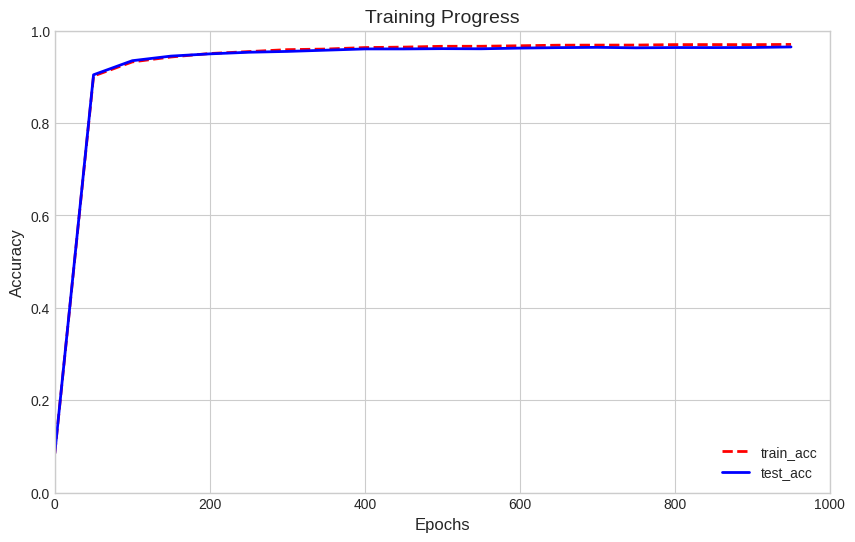

In [69]:
# epochs가 1000이고 50마다 기록했으므로 총 20개의 데이터 포인트가 있음
x = np.arange(len(train_acc_list))  # [0, 1, 2, ..., 19]
epochs_points = x * 50  # [0, 50, 100, ..., 950]

plt.figure(figsize=(10, 6))  # 그래프 크기 설정
plt.plot(epochs_points, train_acc_list, 'r--', label='train_acc', linewidth=2)
plt.plot(epochs_points, test_acc_list, 'b-', label='test_acc', linewidth=2)

plt.title('Training Progress', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend(loc='lower right')  # loc=5와 동일하지만 더 명시적
plt.grid(True)
plt.xlim([0, 1000])  # x축 범위 명시적 설정
plt.ylim([0, 1.0])   # y축 범위를 0~1로 설정

plt.show()

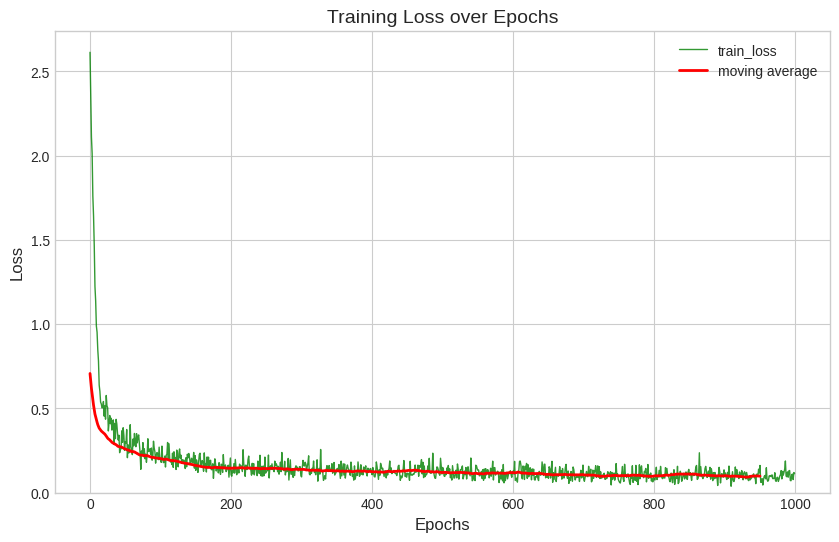

In [71]:
plt.figure(figsize=(10, 6))  # 그래프 크기 설정
plt.plot(np.arange(1000), train_loss_list, color='green', label='train_loss', alpha=0.8, linewidth=1)

# 이동 평균을 추가하여 트렌드를 더 잘 볼 수 있게 함
window_size = 50
moving_avg = np.convolve(train_loss_list, np.ones(window_size)/window_size, mode='valid')
plt.plot(np.arange(len(moving_avg)), moving_avg, color='red', label='moving average', linewidth=2)

plt.title('Training Loss over Epochs', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend()
plt.grid(True)

# y축 범위 설정 (loss가 너무 크면 조정 필요)
plt.ylim(bottom=0)  # 최소값을 0으로 설정

plt.show()